# PSET 4

### Juan M Jimenez R.

## Question 2
### Part A

In [1]:
#using Pkg
#Pkg.add("JLD2")

using Distributions, Random, PrettyTables, QuadGK, Plots, Roots, JLD2

In [2]:
#Creating the numerical integration function 
function numProb(c,Î±) 
   
    Ï‡_crit = quantile(Chisq(1), 1-Î±)
    prob= quadgk(z -> ((z+c)^2>Ï‡_crit)*pdf(Normal(0,1),z), -Inf, Inf, atol=1e-8)[1]
    
    return prob
end

numProb (generic function with 1 method)

### Part B 

In [3]:
#Creating the probability function with built in command 
function builtinProb(c,Î±) 
   
    Ï‡_crit = quantile(Chisq(1), 1-Î±)
    prob= 1 - cdf(NoncentralChisq(1,c^2), Ï‡_crit)[1]
    
    return prob
end

builtinProb (generic function with 1 method)

In [4]:
store1=zeros(100,2)
store2=zeros(100,2)
c=zeros(100,1)

for i=1:100
    c[i]=0.1*i
    store1[i,1]=numProb(c[i],0.05)
    store2[i,1]=builtinProb(c[i],0.05)
    store1[i,2]=@elapsed numProb(c[i],0.05)
    store2[i,2]= @elapsed builtinProb(c[i],0.05)
end 

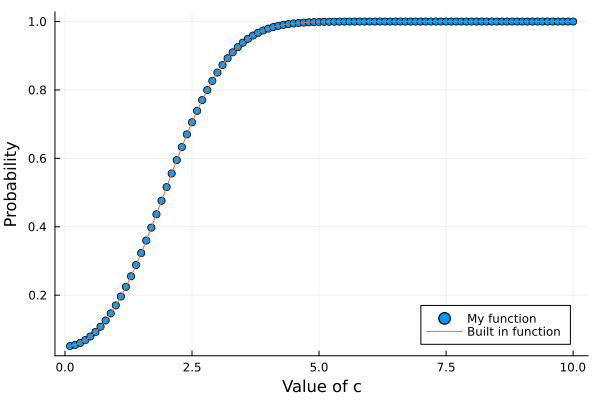

In [5]:
scatter(c, store1[:,1], label="My function", legend=:bottomright)
plot!(c, store2[:,1], label="Built in function ")
plot!(xlabel="Value of c", ylabel="Probability")

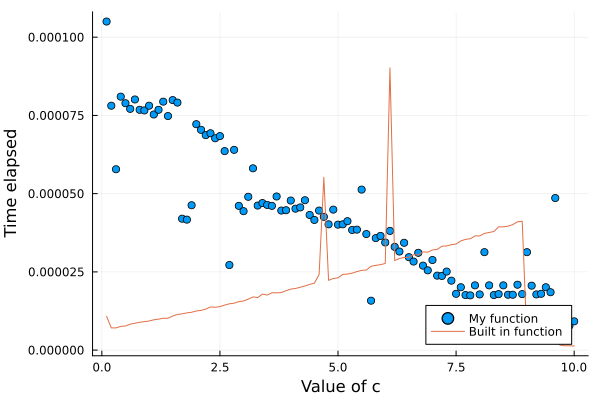

In [6]:
scatter(c, store1[:,2], label="My function", legend=:bottomright)
plot!(c, store2[:,2], label="Built in function ")
plot!(xlabel="Value of c", ylabel="Time elapsed")

As it can be seen from the plots, both functions give similar results when calculating the probability. It seems that the function `numProb` is almost always slower than `builtinProb`. However, at some values of the centrality paramter it turns out that the `numProb` is faster. 

### Part C

In [7]:
find_zero( c -> 0.8-builtinProb(c,0.05), (0,10), atol=1e-10)

2.8015817871962554

The non-centrality parameter for Ï€=0.8 with Î±=0.05 is approximately 2.8

## Question 3
### Part A

About the hints:
- The relationship between the $z$-test and the $\chi_1$-test (1 degree of freedom) is that the z-dist to the power of 2 is equal to the chi distr. That is why for an $\alpha=5\%$ they generate the same p-value (as I show in the previous lines).
- I will consider the the local alternatives framework: $\theta=\theta_0+\delta/\sqrt{n}$
- I will consider a standard error is $std.err_n=\hat{w}_n/\sqrt{n}$

#### Answer:
- The power of the test we want to test is $P((\sqrt{n}(\hat{\theta}_n-\theta_0)/w)^2 >\chi^2_{1,1-\alpha})$
- This can be separated into $P((\sqrt{n}(\hat{\theta}_n-\theta)/w  +  \sqrt{n}(\theta-\theta_0)/w)^2 >\chi^2_{1,1-\alpha})$
- Where the first term is a st-normal(0,1) and the second term is equal to $\delta/w$
- Therefore we can rewrite the power of the test as $P((z+\delta/w)^2 >\chi^2_{1,1-\alpha})$, or
- We can write it as $P((z+|c|)^2 >\chi^2_{1,1-\alpha})$
- So we have that the relationship between the noncentralized parameter and the MDE is the following:

$$|c^*|=|\delta/\hat{w}_n|=|\sqrt{n}*(MDE-\theta_0)/\hat{w}_n|$$

Solving for MDE we have the following relationship:

#### Equation 1:
$$MDE=(|c^*|*\hat{w}_n)/\sqrt{n}$$ 

where 
- $c^*=c(\alpha,\pi)$
- $MDE=\theta(\alpha,\pi,n)$
- $\hat{w}_n$ is the estimate of $w$

And finally, we have that:

#### Equation 2:
$$ \pi = P((z+|c^*|)^2 >\chi^2_{1,1-\alpha}) $$


Therefore,the MDE is directly proportional to the non centrality parameter. In addition, we can get the value of $|c^*|$ from Equation 2, and then we can calculate the MDE with Equation 1. 

### Part B

In [8]:
F = jldopen("627_ps_04-23-3-data.jld2")

JLDFile C:\Github\UBC-phd\627-metrics-II\627_ps_04-23-3-data.jld2 (read-only)
 â”œâ”€ðŸ”¢ Y
 â”œâ”€ðŸ”¢ X1
 â”œâ”€ðŸ”¢ X2
 â””â”€ðŸ”¢ Z1

In [9]:
Y=F["Y"];
X1=F["X1"];
X2=F["X2"];
Z1=F["Z1"];

### Part C

In [24]:
#MDE function (equation 1)
function mdeCal(Î±,Ï€,n,w)
    
    cstar = find_zero( c -> 0.8-builtinProb(c,0.05), (0,10), atol=1e-10)
    mde = cstar*w/sqrt(n)
    
    return mde
end    

#N size function (equation 2)
function n_size(Î±,Ï€,MDE,w)
    
    size = find_zero(n->mde(Î±,n,x,w)-MDE,(0,10^5), atol=1e-10)
    
    return size
end

#Z-test function 
function ztest(Î², Ïƒ, Î±) 
    
    z = Î²/Ïƒ
    #z_Î± = quantile(Normal(), 1- Î±/2)
    pz = 2*(1-cdf(Normal(0,1), z))
    
    if pz <= Î±
        
        print("Rejects the null at Î±=", Î±*100, "%, t-stat=", z, "p-value=", pz)
        
    else
        
        print("Cannot reject the null at Î±=", Î±*100, "%, t-stat=", z, "p-value=", pz)
    end
    
    return z, pz
end

ztest (generic function with 1 method)

LoadError: MethodError: no method matching cdf(::Float64, ::Float64)
[0mClosest candidates are:
[0m  cdf([91m::StudentizedRange[39m, ::Real) at C:\Users\juami\.julia\packages\Distributions\bQ6Gj\src\univariates.jl:636
[0m  cdf([91m::NoncentralBeta[39m, ::Real) at C:\Users\juami\.julia\packages\Distributions\bQ6Gj\src\univariates.jl:636
[0m  cdf([91m::Biweight{T}[39m, ::Real) where T<:Real at C:\Users\juami\.julia\packages\Distributions\bQ6Gj\src\univariate\continuous\biweight.jl:41
[0m  ...

In [16]:
2*(1-cdf(Normal(0,1), z))

0.7388826803635273